# Project: Investigate a Dataset - NoShowAppointments project

## Table of Contents
<ul>
    
   <li><a href="#intro">Introduction</a></li>
<li><a href="#general">General</a></li>
<li><a href="#data editing">Data editing</a></li>
<li><a href="#eda">Exploratory Data </a></li>
<li><a href="#summary">ٍSummary</a></li>
</ul>


## Introduction
The analysis will be taken from **Kaggel** NoShowAppointments dataset; it's about hospital in Brazil. The project aims to find the cause of the problem to the hospital management and discuss it in the conclusion. Thus, as a point of CRISP-DM, the analysis will show the patient and what are the factors that affect the patients appearing in the hospital.


### Define the data: 

PatientID: Special number of the patient.

AppointmentID: Number for each appointment.

Gender: Female (F) or male (M).

ScheduledDay: The day which the appointment was scheduled.

AppointmentDay: The day to attend.

Age: Year of the patient.

Neighbourhood: Location of the appointment.

Scholarship: 0 means the patient does not have brasilian welfare program. 1 means the patient have brasilian welfare program patient.

Hipertension: 0 means non-chronic disease patient. 1 means chronic disease patient.

Diabetes: 0 means non-chronic disease patient. 1 means chronic disease patient.

Alcoholism:  0 not-alcoholic and 1 means alcoholic.

Handcap: 0 means not handcap  1 means handcap.

SMS_received: 0 not receveid 1 means it was recieved.

No-Show: Patients that did book an appointment and didn't show.

## Questions:

- Q1: Is SMS_received factor have a relationship if the patients shows up ?

- Q2: Doed nighbourhood factor have a relationship or effect on patients to shows up ?

- Q3: Does gender factor have a relationship with patients ?

- Q4: Do patients without any diseases or conditions tend to not show up?

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [2]:
#implmeting all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




### General section

In [3]:
# First we will load the data and have a look at the first 10 rows
df_project = pd.read_csv('noshowappointments.csv')
df_project.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# Then lets see how many rows and columns the data have
df_project.shape

(110527, 14)

In [5]:
# Then Let us see the data type of all the columns and if they countian a Null values or not
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### We can notice the PatientId is float64, while it's suppose to be an integer, also their are 0 null count so we dont need to clean the null values

In [6]:
# convert PatientId column to int
df_project['PatientId'] = df_project['PatientId'].astype(int)
df_project['PatientId'].dtypes

dtype('int32')

In [7]:
# Let's have a summary of the data to find if there is anything wrong
df_project.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,-2.140311e+09,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,1.508486e+08,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-2.147484e+09,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The minimum age is -1 which does not make any sense, so we should clean all ages below 0.

In [8]:
# Fisrt lets see how many data that have age less than 0
df_project.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,-2147483648,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### Only one sample so we should delete it.

<a id='Data Cleaning'></a>

## Data editing section
> This section I will define groups and edit the data by removing any error data , edit the column names, and group (Show or NoShow).

In [9]:
# removing the age = -1 value from the data that have 99832 index.
df_project.drop(index = 99832 , inplace = True)

In [10]:
# check after removing the age = -1
df_project.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,-2.140311e+09,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,1.508492e+08,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,-2.147484e+09,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# Some column names are misspelled so let's correct them 
df_project.rename(columns = {'No-show':'Not showing'} , inplace = True)
df_project.rename(columns = {'Hipertension':'Hypertension'} , inplace = True)
df_project.rename(columns = {'Handcap':'Handicap'} , inplace = True)

In [12]:
# check if the column names is changed
df_project.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Not showing'],
      dtype='object')

In [13]:
# removing unwanted data labels (ID's and Days)
df_project.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace = True)

In [14]:
# check if the column are droped
df_project.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Not showing'],
      dtype='object')

<a id='eda'></a>

## Exploratory Data section

> This section are about visualization and statical.

#### First Let's see how many patient showed at the hospitial

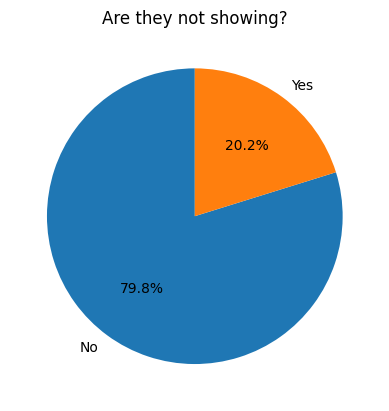

In [15]:
# Count the frequency of 'Yes' and 'No'
counts = df_project['Not showing'].value_counts()

# Plot a pie chart
plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Are they not showing?')
plt.show()

#### From the graph we can see that fifth of the patient are not showing 

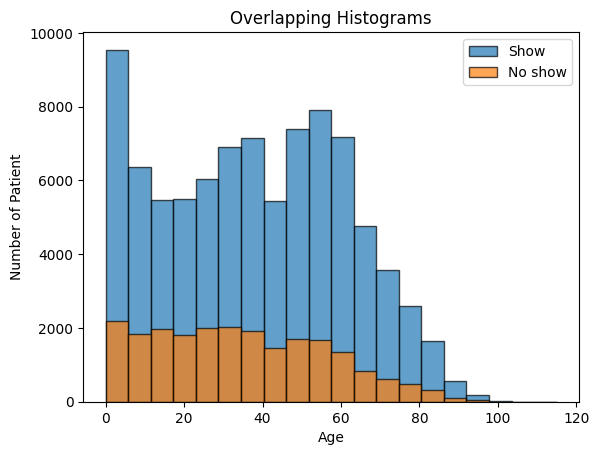

In [16]:
# Now let's see how many patient showed based on their ages.
Show = df_project['Not showing'] == 'No'
NoShow = df_project['Not showing'] == 'Yes'

# Create histograms from the data
plt.hist(df_project[Show]['Age'], bins=20, alpha=0.7, label='Show', edgecolor='black')
plt.hist(df_project[NoShow]['Age'], bins=20, alpha=0.7, label='No show', edgecolor='black')

# Set the title and labels
plt.title('Overlapping Histograms')
plt.xlabel('Age')
plt.ylabel('Number of Patient')

# Add a legend
plt.legend()

#### As shown in the figur most of the patient ages show in the hospital are from 0-7 years old. From bussines stanpoint, we could increase the number of childe care facility to accoumadite more child patients to increase the profit of the hospital.

<module 'matplotlib.pyplot' from 'C:\\Users\\tamee\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

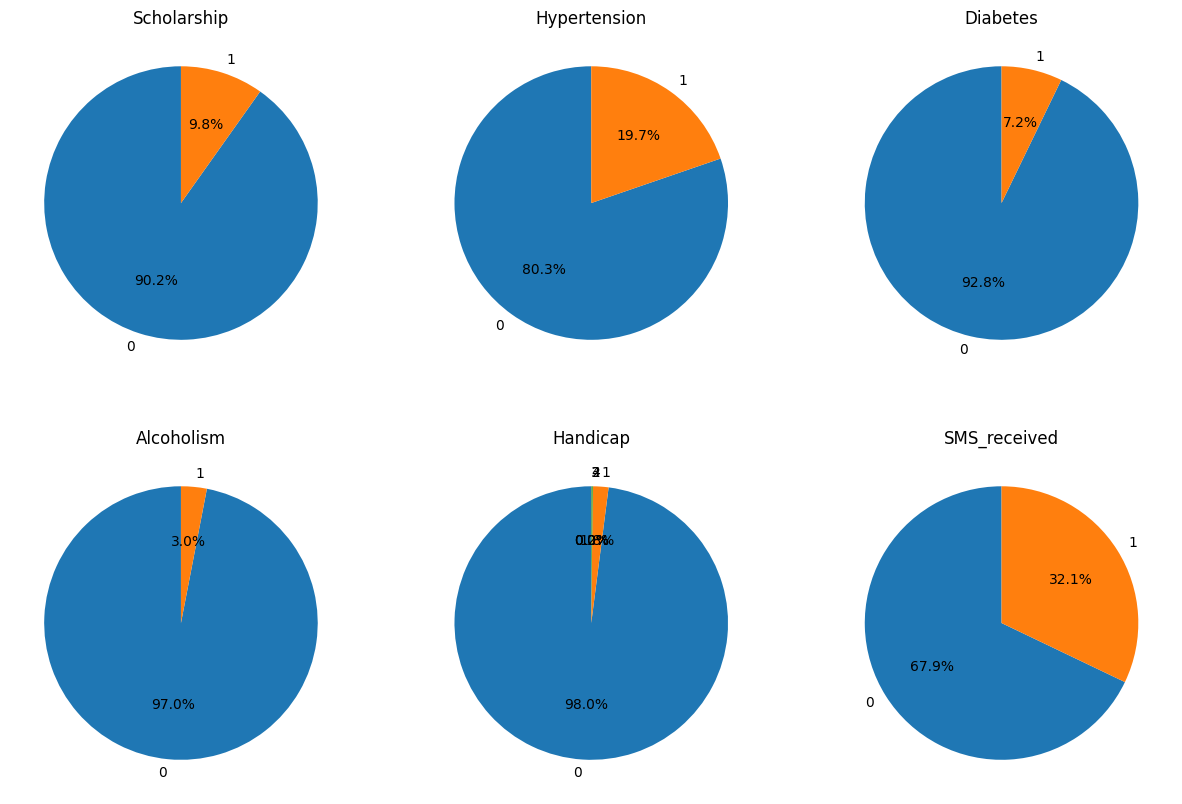

In [17]:
# Let's visualize the percentage for all the other positive condition/status data

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
# Generate pie charts for each column
for i, column in enumerate(['Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']):
    counts = df_project[column].value_counts()
    axs[i].pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%')
    axs[i].set_title(column)

plt

#### As shown in pie graph only third of the patients recived SMS massages and only tinth of the patients have a scholarship and from above conditions most of the patients have hypertension.

#### To investigate more, let's see the number of patients that represent these percentage.

<module 'matplotlib.pyplot' from 'C:\\Users\\tamee\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

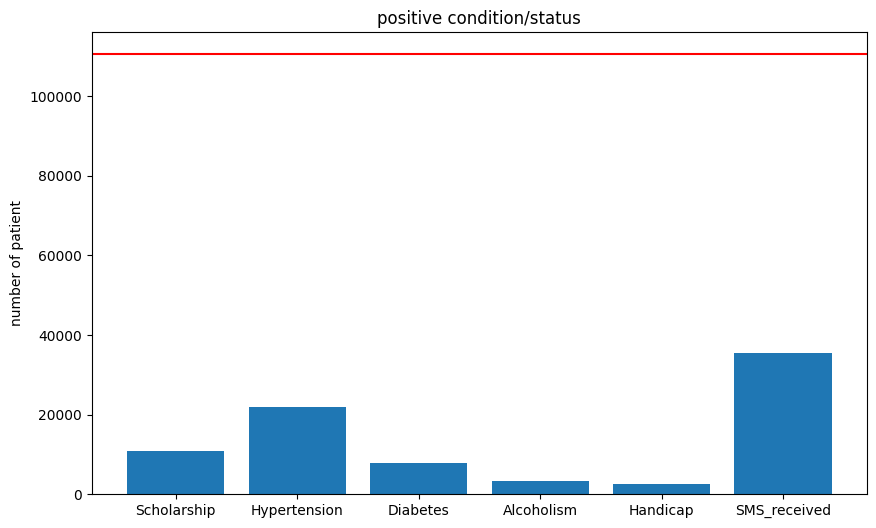

In [18]:
# Calculate the sum of 1's for each column
sums = df_project[['Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sums.index, sums.values)

# Draw a horizontal line at the total number of patient
plt.axhline(y=df_project.shape[0], color='r', linestyle='-')

# Add labels and title
plt.ylabel('number of patient')
plt.title('positive condition/status')
plt

#### As stated in the above pie chart comments, only third of the patients recived SMS massages and only tinth of the patients have a scholarship and from above conditions most of the patients have hypertension.

### Q1: Is SMS_received factor have a relationship if the patients shows up ?

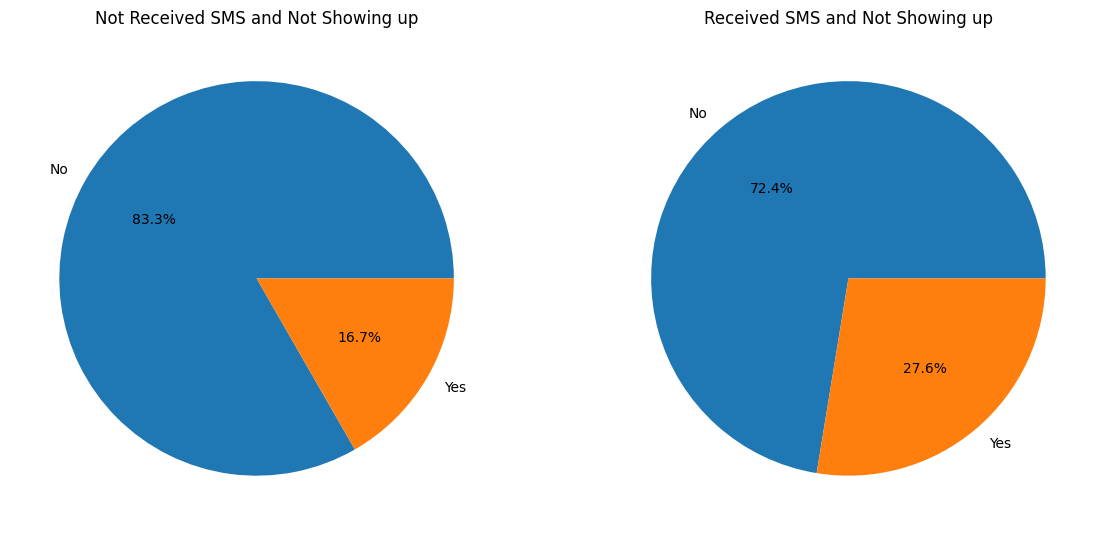

In [19]:
def plot_sms_no_show_data(df_project):
    """
    This function takes a DataFrame and plots:
    - Two pie charts showing the percentage of no-shows based on SMS receipt status.

    Input:
    df_project (pd.DataFrame): The DataFrame containing the project data.

    Output:
    Plot two plt pie charts of SMS received and not received.
    """
    
    # Plot two pie charts showing the percentage of no-shows based on SMS receipt status
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    SMS_NOTreceived = df_project[df_project['SMS_received'] == 0]['Not showing'].value_counts()
    axs[0].pie(SMS_NOTreceived, labels = SMS_NOTreceived.index, autopct='%1.1f%%')
    axs[0].set_title('Not Received SMS and Not Showing up')

    SMS_received = df_project[df_project['SMS_received'] == 1]['Not showing'].value_counts()
    axs[1].pie(SMS_received, labels = SMS_received.index, autopct='%1.1f%%')
    axs[1].set_title('Received SMS and Not Showing up')

    plt

plot_sms_no_show_data(df_project)

#### Surprisingly the result showd that patients that received sms are not showing more!! so from business standpoint we say that sms masseges are not important 


## Q2:Doed nighbourhood factor have a relationship or effect on patients to shows up ?

<module 'matplotlib.pyplot' from 'C:\\Users\\tamee\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

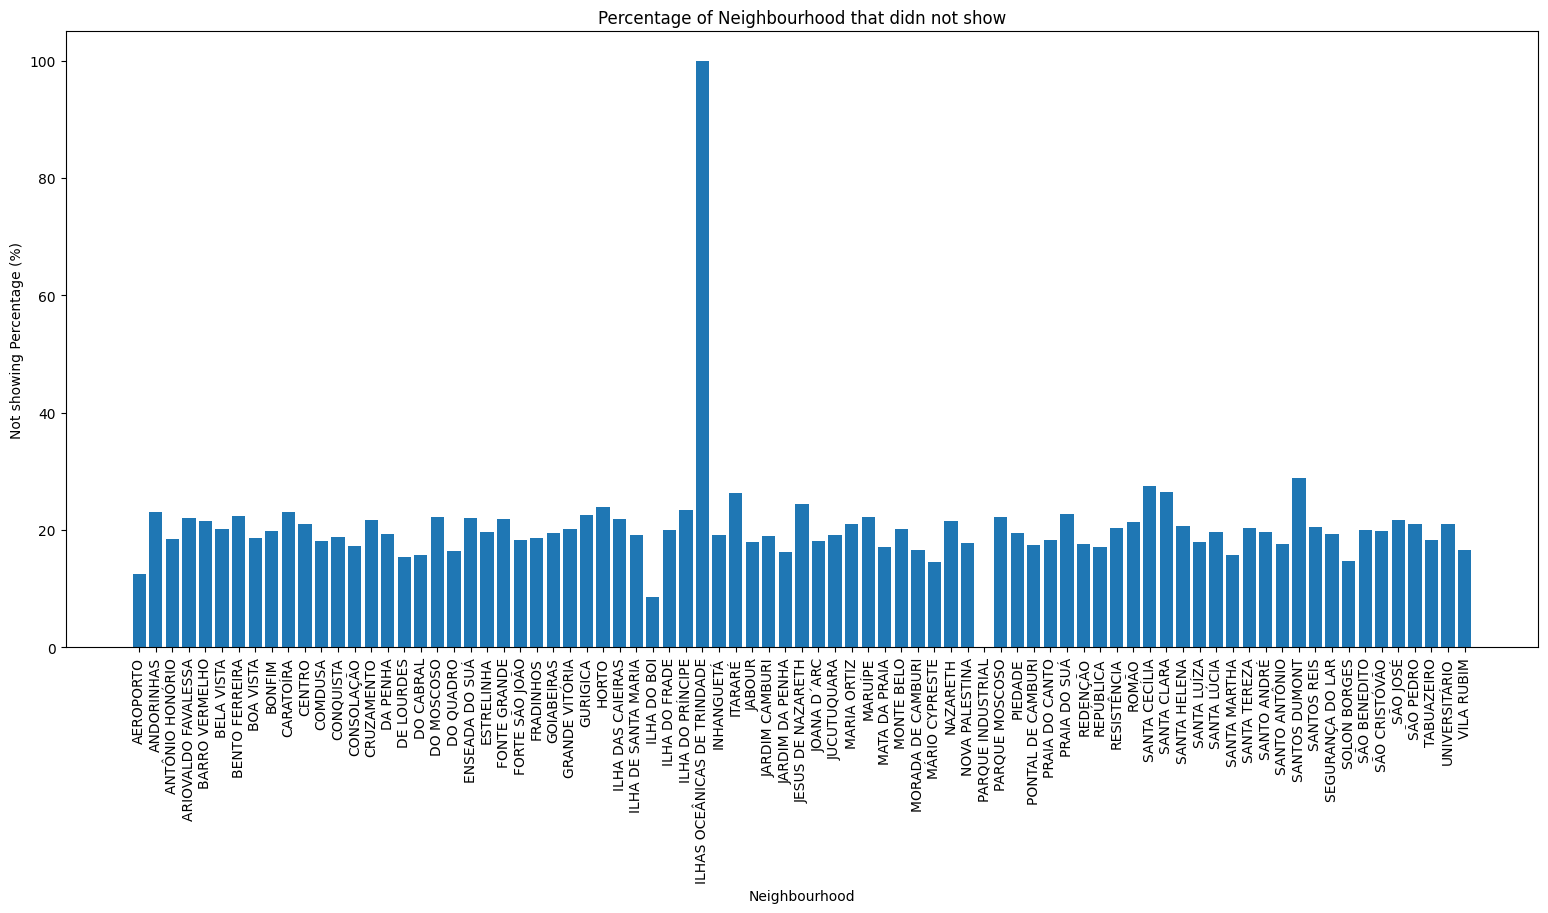

In [20]:
# Replace No and Yes with 0 and 1 for easier calculations
df_project['Not showing2'] = df_project['Not showing'].map({'No': 0, 'Yes': 1})

df_grouped = df_project.groupby('Neighbourhood')['Not showing2'].agg(['sum', 'count']).reset_index()

# Calculate the percentage of no-shows for each neighbourhood
df_grouped['Percentage'] = df_grouped['sum'] / df_grouped['count'] * 100

# Plot
plt.figure(figsize=(19,8))
plt.bar(df_grouped['Neighbourhood'], df_grouped['Percentage'])
plt.xlabel('Neighbourhood')
plt.ylabel('Not showing Percentage (%)')
plt.title('Percentage of Neighbourhood that didn not show')
plt.xticks(rotation=90) 
plt

#### Surprisingly ILHAS OCEÃ‚NICAS DE TRINDADE neighbourhood 100% did not show up and PARQUE INDUSTRIAL all of them show up. To investgate more, we should count the number of patients in all neighbourhood

In [21]:
# Group by neighbourhood and count the number of patients
df_project['Neighbourhood'].value_counts()


Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

#### There is only 2 and 1 patients in ILHAS OCEÃ‚NICAS DE TRINDADE and PARQUE INDUSTRIAL and that explain the result.
#### from this result we can notice those far neighbourhood have very few patients, and from business standpoint we can build another hospital around these neighbourhood. 

## Q3:Does gender factor have a relationship with patients ?

#### First let's have a look at the percentage of malels and females that did not show up

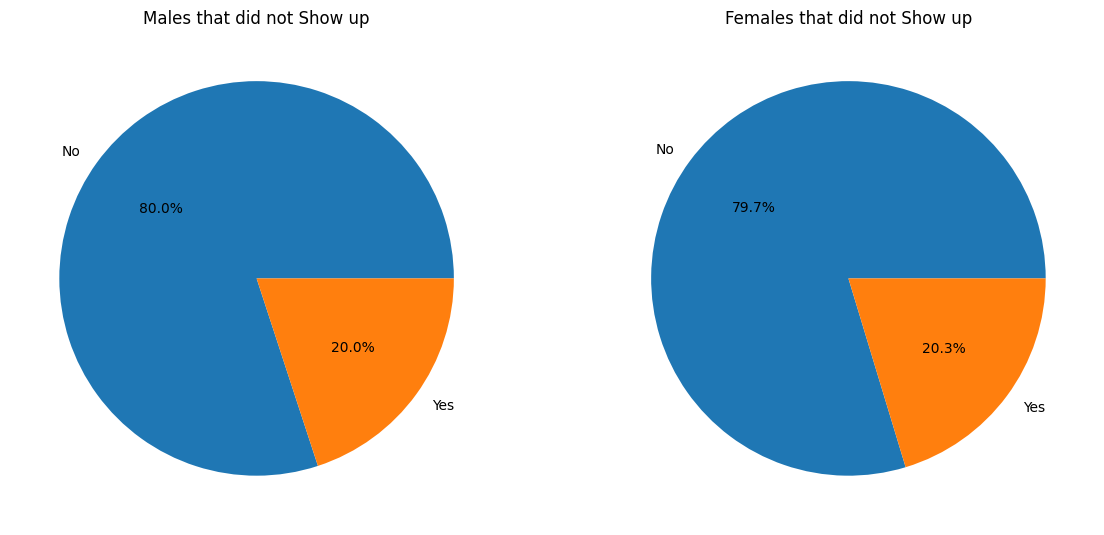

In [22]:
def plot_gender_no_show_data(df_project):
    """
    This function takes a DataFrame and plots:
    - Two pie charts showing the percentage of no-shows for each gender.

    Input:
    df_project (pd.DataFrame): The DataFrame containing the project data.

    Output:
    Plot two plt pie charts of male and female not showing up.
    """
    # Plot two pie charts showing the percentage of no-shows for each gender
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    Male = df_project[df_project['Gender'] == 'M']['Not showing'].value_counts()
    axs[0].pie(Male, labels = Male.index, autopct='%1.1f%%')
    axs[0].set_title('Males that did not Show up')

    Female = df_project[df_project['Gender'] == 'F']['Not showing'].value_counts()
    axs[1].pie(Female, labels = Female.index, autopct='%1.1f%%')
    axs[1].set_title('Females that did not Show up')

    plt

plot_gender_no_show_data(df_project)

#### We can see that male and female patients have almost the same percentage.

#### Then we can know calculate the percentage of male and female patients in the hospital.

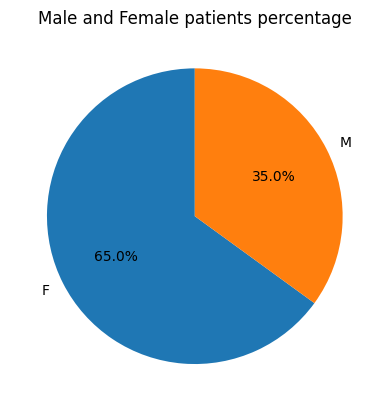

In [23]:
# Count the frequency of 'Yes' and 'No'
counts = df_project['Gender'].value_counts()

# Plot a pie chart
plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Male and Female patients percentage')
plt.show()

#### Most of the hospital patients are female. From business standpoint we can increase the female staff

## Q4: Do patients without any diseases or conditions tend to not show up?

<module 'matplotlib.pyplot' from 'C:\\Users\\tamee\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

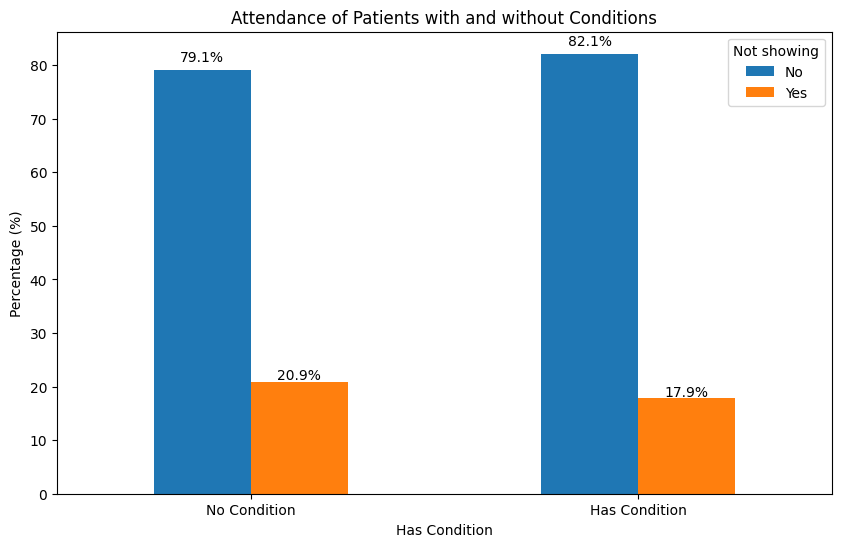

In [24]:
# Create new column 'Has_Condition' that indicates whether a patient has at least one condition or not
df_project['Has_Condition'] = df_project[['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']].sum(axis=1) >= 1
grouped = df_project.groupby(['Has_Condition', 'Not showing']).size().unstack()

# Calculate the percentage
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Has Condition')
plt.ylabel('Percentage (%)')
plt.title('Attendance of Patients with and without Conditions')
plt.xticks([0, 1], ['No Condition', 'Has Condition'], rotation=0)  # replace the x-axis labels

# Add percentages on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height*1.02), ha='center')
    
plt

#### The graph shows that patients that do not have any condition tend not to show up. From a business standpoint, we could make a general check clinic for patients with no condition to increase the number of patients to increase the profit of the hospital.

<a id='conclusions'></a>

## Summary


### Conclusions

- Most of patients ages in between 0-7 year.

- The Show patients without receving SMS are higher than Show patients with receving SMS!.

- The neighbourhood does have a effects on the number of patients.

- Most of the patients gender attend appointments females more than male.

#### Limitations 

- The neighborhood lacks specific distance information.

- More data are needed to fully understand people's behavior such as whether at that time and sms reminder time sent etc...

- No details about the level of addiction, handicap type , diabtes ( is it level 1 or 2 ? ).